Chapter 16

# 最大似然估计
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码演示了通过最大似然估计（MLE）求解正态分布的参数 $\theta_1 = \mu$ 和 $\theta_2 = \sigma^2$ 的过程。使用了一组观测数据 $[-2.5, -5, 1, 3.5, -4, 1.5, 5.5]$ 来构建似然函数 $L(\theta_1, \theta_2)$，并通过对数变换和求导得到极大似然估计解。

1. **计算样本统计量**：先计算样本均值 $\bar{x}$ 和样本方差 $s^2$ 作为初步估计：
   $$
   \mu = \text{np.mean(samples)}
   $$
   $$
   \sigma^2 = \text{np.var(samples)}
   $$

2. **构建对数似然函数**：定义负对数似然函数 $\ln L$，公式如下，其中 $n$ 为样本数量，$A$ 为观测数据与 $\theta_1$ 的偏差平方和：
   $$
   A = \sum_{i=1}^n (x_i - \theta_1)^2
   $$
   $$
   \ln L = -\frac{n}{2} \ln(2\pi) - \frac{n}{2} \ln(\theta_2) - \frac{A}{2\theta_2}
   $$

3. **求解参数估计**：对 $\ln L$ 分别对 $\theta_1$ 和 $\theta_2$ 求导数，将导数设为零以获得一阶条件，求解得到最大似然估计 $\theta_1^*$ 和 $\theta_2^*$：
   - $\frac{\partial \ln L}{\partial \theta_1} = 0$
   - $\frac{\partial \ln L}{\partial \theta_2} = 0$
   结果 $\theta_1^*$ 和 $\theta_2^*$ 为似然函数的最大化解，即正态分布的均值和方差。

4. **可视化**：在 $\theta_1$ 和 $\theta_2$ 空间中绘制 $\ln L$ 的等高线和三维图，展示不同参数下的 $\ln L$ 值，并标记极大似然解点 $(\theta_1^*, \theta_2^*)$

In [1]:
import numpy as np
from sympy import symbols, ln, simplify, lambdify, diff, solve, Float
import matplotlib.pyplot as plt

## 定义符号变量

In [2]:
theta_1, theta_2 = symbols('theta_1 theta_2')

## 定义样本数据并计算均值

In [3]:
samples = [-2.5, -5, 1, 3.5, -4, 1.5, 5.5]
mu = np.mean(samples)  # 样本均值
print(mu)

0.0


## 样本数量与方差

In [4]:
n = len(samples)
bias_std = np.std(samples)  # 样本标准差
bias_var = bias_std**2  # 样本方差
print(bias_var)

13.285714285714288


## 计算A，即似然函数中的误差平方和项

In [5]:
A = 0
for i in np.arange(n):
    term_i = (samples[i] - theta_1)**2  # 误差平方
    A = A + term_i

A = simplify(A)  # 简化表达式
print(A)

7.0*theta_1**2 + 93.0


## 定义对数似然函数

In [6]:
lnL = -n/2*np.log(2*np.pi) - n/2*ln(theta_2) - 1/2/theta_2*A

## 对数似然函数简化

In [7]:
lnL = simplify(lnL)
print(lnL)

(-3.5*theta_1**2 + theta_2*(-3.5*log(theta_2) - 6.43256973243271) - 46.5)/theta_2


## 定义 θ1 和 θ2 的范围，用于绘制对数似然函数的图形

In [8]:
theta_1_array = np.linspace(mu-3, mu+3, 40)  # θ1 范围
theta_2_array = np.linspace(bias_var*0.8, bias_var*1.2, 40)  # θ2 范围

## 生成网格，用于绘图

In [9]:
theta_11, theta_22 = np.meshgrid(theta_1_array, theta_2_array)

## 将对数似然函数转换为数值函数

In [10]:
lnL_fcn = lambdify((theta_1, theta_2), lnL)

## 计算对数似然函数在网格点上的值

In [11]:
lnL_matrix = lnL_fcn(theta_11, theta_22)

## 计算对数似然函数的偏导数

In [12]:
df_dtheta_1 = diff(lnL, theta_1)  # θ1 的偏导
print(df_dtheta_1)

-7.0*theta_1/theta_2


In [13]:
df_dtheta_2 = diff(lnL, theta_2)  # θ2 的偏导
print(df_dtheta_2)

(-3.5*log(theta_2) - 9.93256973243271)/theta_2 - (-3.5*theta_1**2 + theta_2*(-3.5*log(theta_2) - 6.43256973243271) - 46.5)/theta_2**2


## 解方程，寻找对数似然函数的极值点

In [14]:
sol = solve([df_dtheta_1, df_dtheta_2], [theta_1, theta_2])
print(sol)

[(0.0, 13.2857142857143)]


## 提取极值点坐标

In [15]:
theta_1_star = sol[0][0].evalf()  # θ1 的极值
theta_2_star = eval(str(sol[0][1]))  # θ2 的极值
print(theta_1_star)
print(theta_2_star)

0
13.2857142857143


## 计算极值点的对数似然函数值

In [16]:
lnL_min = lnL_fcn(theta_1_star, theta_2_star)
print(lnL_min)

-18.9859824367755


## 绘制三维对数似然函数图像

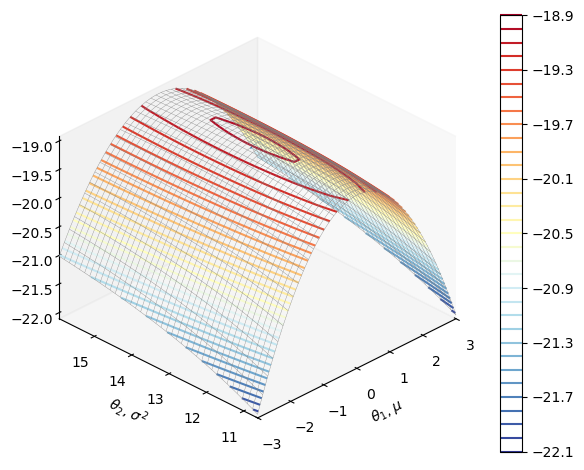

In [17]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(theta_11, theta_22, lnL_matrix, color=[0.5, 0.5, 0.5], linewidth=0.25)

## 在图中标出极值点
plt.plot(theta_1_star, theta_2_star, lnL_min, marker='x', markersize=12)

## 绘制等高线并添加颜色条
colorbar = ax.contour(theta_11, theta_22, lnL_matrix, 30, cmap='RdYlBu_r')
fig.colorbar(colorbar, ax=ax)

ax.set_proj_type('ortho')  # 设置正交投影
ax.set_xlabel(r'$\theta_1$, $\mu$')
ax.set_ylabel(r'$\theta_2$, $\sigma^2$')
plt.tight_layout()
ax.set_xlim(theta_11.min(), theta_11.max())
ax.set_ylim(theta_22.min(), theta_22.max())
ax.view_init(azim=-135, elev=30)  # 设置视角
ax.grid(False)

## 绘制二维等高线图

Text(0, 0.5, '$\\theta_2$, $\\sigma^2$')

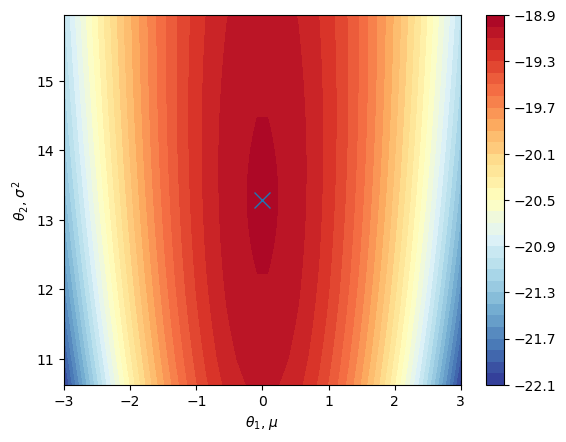

In [18]:
fig, ax = plt.subplots()

colorbar = ax.contourf(theta_11, theta_22, lnL_matrix, 30, cmap='RdYlBu_r')
fig.colorbar(colorbar, ax=ax)
plt.plot(theta_1_star, theta_2_star, marker='x', markersize=12)

ax.set_xlim(theta_11.min(), theta_11.max())
ax.set_ylim(theta_22.min(), theta_22.max())
ax.set_xlabel(r'$\theta_1$, $\mu$')
ax.set_ylabel(r'$\theta_2$, $\sigma^2$')